<a href="https://colab.research.google.com/github/ounospanas/AIDL_B_CS01/blob/main/Text_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import re
sentence = 'Hi there! I am Panagiotis.'
print(re.match('Hi', sentence))

<re.Match object; span=(0, 2), match='Hi'>


In [2]:
""" w+ finds the first alphanumeric character and then check the next character and if it is alphanumeric
then include it in the match too, repeat until you run into a non-alphanumeric character. """

word_regex = '\w+'
print(re.match(word_regex, sentence))

<re.Match object; span=(0, 2), match='Hi'>


In [3]:
word_regex = '\s'
print(re.split(word_regex, sentence))

['Hi', 'there!', 'I', 'am', 'Panagiotis.']


In [4]:
word_regex = '\s'
print(re.search(word_regex, sentence))

<re.Match object; span=(2, 3), match=' '>


In [5]:
#re.match searches only at the beggining of the text
word_regex = '\s'
print(re.match(word_regex, sentence))

None


In [6]:
#re.find_all searches everywhere
word_regex = '\s'
print(re.findall(word_regex, sentence))

[' ', ' ', ' ', ' ']


In [7]:
import re

# Write a pattern to match sentence endings: sentence_endings
# The letter ‘r’ stands for ‘raw string’.
sentence_endings = r"[.?!]"

# Split my_string on sentence endings and print the result
print(re.split(sentence_endings, sentence))

# Find all capitalized words in my_string and print the result
capitalized_words = r"[A-Z]\w+"
print(re.findall(capitalized_words,sentence))

# Split my_string on spaces and print the result
spaces = r"\s+"
print(re.split(spaces, sentence))

# Find all digits in my_string and print the result
digits = r"\d+"
print(re.findall(digits, sentence))


['Hi there', ' I am Panagiotis', '']
['Hi', 'Panagiotis']
['Hi', 'there!', 'I', 'am', 'Panagiotis.']
[]


In [8]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

sentence = "I don't feel well today..."
word_tokenize(sentence)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['I', 'do', "n't", 'feel', 'well', 'today', '...']

In [9]:
import re
match_digits_and_words = ('[A-Za-z]+|[!,]')
re.findall(match_digits_and_words,'Moreover, I scored 3 goals tonight! #football')

['Moreover', ',', 'I', 'scored', 'goals', 'tonight', '!', 'football']

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


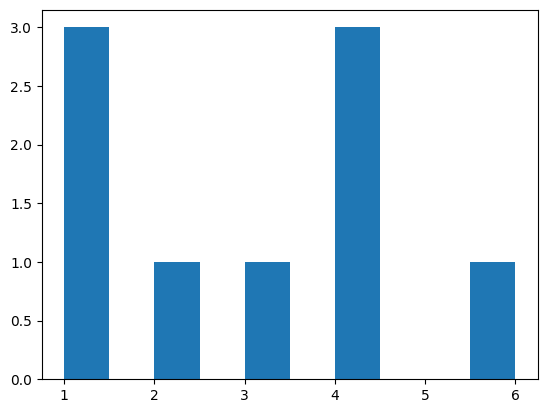

In [10]:
import nltk
nltk.download('punkt')

from matplotlib import pyplot as plt
from nltk.tokenize import word_tokenize
words = word_tokenize("This is the best course ever!!!")
#print('Words:',words)

word_lengths = [len(w) for w in words]
#print('Word lengths:', word_lengths)

plt.hist(word_lengths)
plt.show()

In [11]:
from nltk.tokenize import word_tokenize
from collections import Counter
counter = Counter(word_tokenize("""a dog barked at a cat."""))
counter

Counter({'a': 2, 'dog': 1, 'barked': 1, 'at': 1, 'cat': 1, '.': 1})

In [12]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
text = """a dog barked at a cat."""
tokens = [w for w in word_tokenize(text.lower())]
no_stops = [t for t in tokens if t not in stopwords.words('english')]
no_stops

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['dog', 'barked', 'cat', '.']

In [13]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

ps = PorterStemmer()
words = ["jump", "jumped", "jumping", "jumps"]

for w in words:
    print(w, ps.stem(w))

jump jump
jumped jump
jumping jump
jumps jump


In [14]:
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lem = WordNetLemmatizer()

# pos defines if the input word is a verb, adjective, noun etc.
print("sang", lem.lemmatize("sang", pos='v'))
print("corpora", lem.lemmatize("corpora"))
print("better", lem.lemmatize("better", pos='a'))

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


sang sing
corpora corpus
better good


In [15]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

corpus = ['I work as a research in the field of computer science.',
          'Artificial intelligence is a field of computer science',
          'I work as a chemical engineer',]
stop_words = set(stopwords.words('english'))
vectorizer = TfidfVectorizer(stop_words=list(stop_words))

#compute tf_idf for each sentence in the corpus
tf_idf = vectorizer.fit_transform(corpus)

# 1.0 is the maximum and 0.0 is the minimum similarity
print('The cosine similarity of the 1st and the 2nd document is: ',
      cosine_similarity(tf_idf[0], tf_idf[1])[0][0])
print('The cosine similarity of the 1st and the 1st document is: ',
      cosine_similarity(tf_idf[0], tf_idf[0])[0][0])
print('The cosine similarity of the 1st and the 3rd document is: ',
      cosine_similarity(tf_idf[0], tf_idf[2])[0][0])
print('The cosine similarity of the 3rd and the 2nd document is: ',
      cosine_similarity(tf_idf[2], tf_idf[1])[0][0])

The cosine similarity of the 1st and the 2nd document is:  0.49322195070222535
The cosine similarity of the 1st and the 1st document is:  1.0000000000000002
The cosine similarity of the 1st and the 3rd document is:  0.19788044431907245
The cosine similarity of the 3rd and the 2nd document is:  0.0


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
